### Check and draw diagram using Single Dice (Probability Distribution)

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Make a list and fill random dice value
list = []
#random.seed(42)
for i in range(10000):
    list.append(random.randint(1, 6))

In [3]:
# first first 4 element
list[:5]

[5, 4, 1, 1, 4]

In [4]:
value_count = pd.Series(list).value_counts()
s = (value_count / value_count.sum()).sort_index()
s

1    0.1635
2    0.1705
3    0.1674
4    0.1682
5    0.1660
6    0.1644
Name: count, dtype: float64

<Axes: >

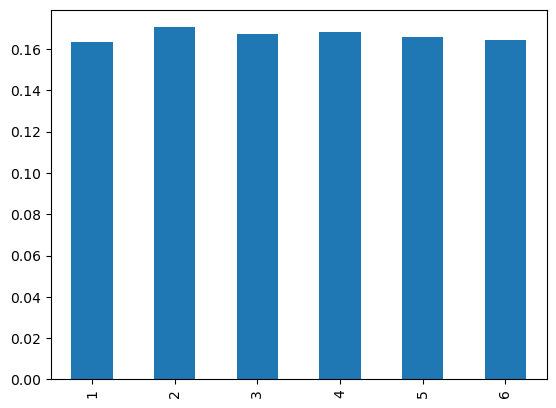

In [5]:
# Plot bar chart
s.plot(kind='bar')

### Check and draw diagram using 2 Dice (Probability Distribution)

In [6]:
multiple_dice_list = []
for i in range(10000):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    multiple_dice_list.append(a + b)

In [7]:
multiple_dice_list[:5]

[2, 9, 2, 3, 8]

In [8]:
value_counts = pd.Series(multiple_dice_list).value_counts()
series = (value_counts / value_counts.sum()).sort_index()

In [9]:
np.cumsum(s) #Calculating CDF

1    0.1635
2    0.3340
3    0.5014
4    0.6696
5    0.8356
6    1.0000
Name: count, dtype: float64

<Axes: >

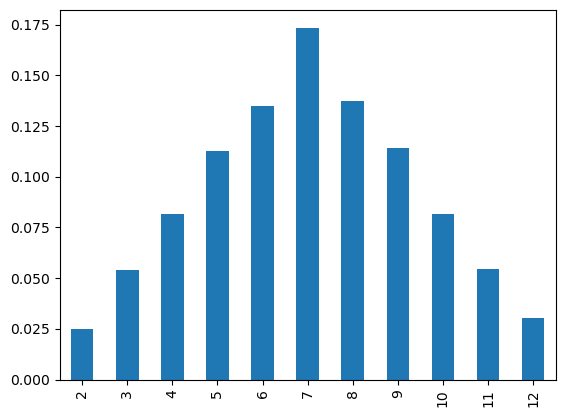

In [10]:
series.plot(kind = 'bar')

<Axes: >

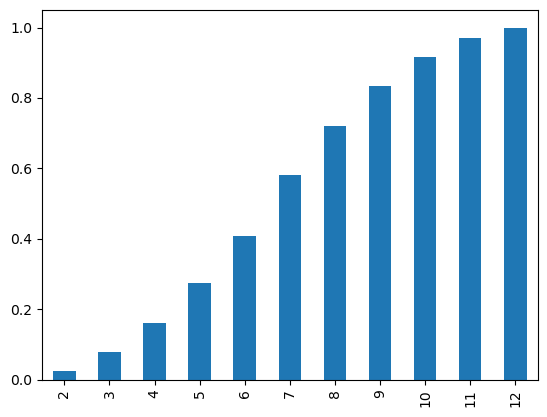

In [11]:
np.cumsum(series).plot(kind='bar')

### Parametric Dendity Estimation(PDF)

In [12]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [13]:
# Get random 1000 records with mean 50 and scale 5
sample = normal(loc=50, scale=5, size=1000)

In [14]:
sample.mean()

np.float64(49.970816116221236)

(array([ 19.,  55., 130., 209., 267., 183.,  92.,  33.,  10.,   2.]),
 array([36.63884913, 39.73128019, 42.82371124, 45.91614229, 49.00857334,
        52.10100439, 55.19343544, 58.28586649, 61.37829754, 64.47072859,
        67.56315964]),
 <BarContainer object of 10 artists>)

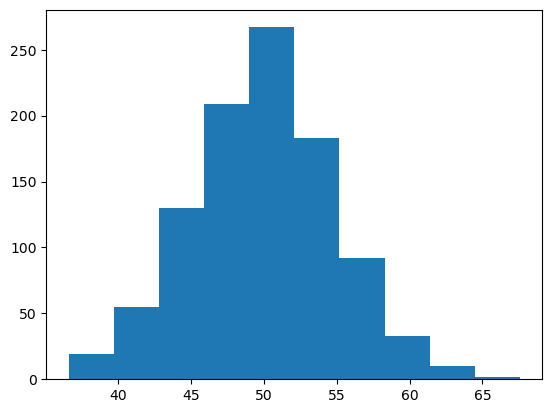

In [15]:
# histogram plaot to understand distribution of data
plt.hist(sample, bins=10)

In [16]:
sample_mean = sample.mean()
sample_std_div = sample.std()

In [17]:
sample_mean, sample_std_div

(np.float64(49.970816116221236), np.float64(4.894450388060043))

In [18]:
#fit the distribution with above calculated mean and std_div
from scipy.stats import norm

dist = norm(60, 12)

In [19]:
values = np.linspace(sample.min(), sample.max(), 100)

In [20]:
sample.max(), sample.min()

(np.float64(67.56315963738601), np.float64(36.63884913492166))

In [21]:
probabilities = [dist.pdf(value) for value in values]

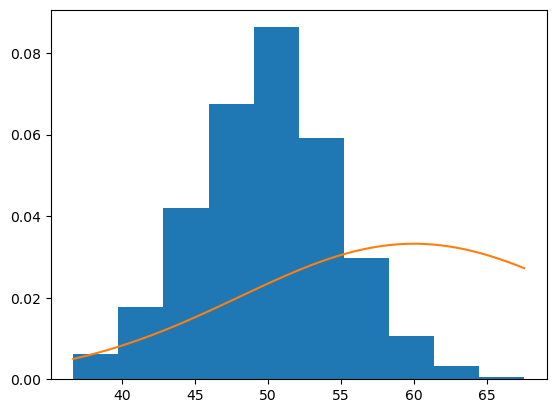

In [22]:
#Plt the histogram and PDf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

/var/folders/6l/9g6t4kp90gn4973plz_3k_c00000gn/T/ipykernel_80278/1421526367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

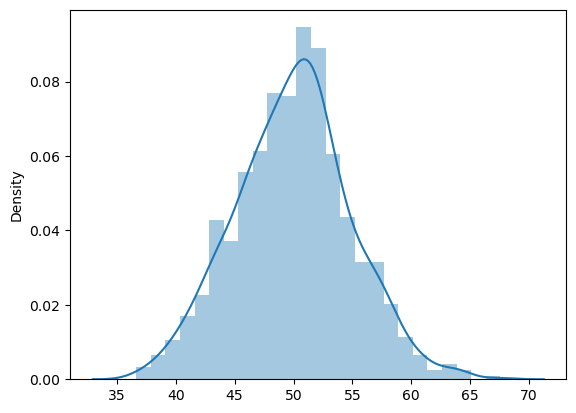

In [23]:
# We can get the same result with seaborn without calculating above stuff ourself
import seaborn as sns
sns.distplot(sample)

### Kernel Density Estimation (KDE)

In [24]:
# Generate sample data
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  0.,  6.,  2.,  7.,  5., 17., 11., 12., 12., 19., 27., 27.,
        20., 20., 28., 20., 10., 15.,  8., 12., 12., 19.,  7., 13., 19.,
        25., 31., 27., 49., 55., 53., 50., 62., 54., 46., 43., 42., 33.,
        19., 25., 15.,  7.,  6.,  3.,  1.,  2.,  1.,  1.,  1.]),
 array([ 6.87841605,  7.86193432,  8.84545259,  9.82897085, 10.81248912,
        11.79600739, 12.77952566, 13.76304393, 14.7465622 , 15.73008047,
        16.71359874, 17.69711701, 18.68063527, 19.66415354, 20.64767181,
        21.63119008, 22.61470835, 23.59822662, 24.58174489, 25.56526316,
        26.54878143, 27.53229969, 28.51581796, 29.49933623, 30.4828545 ,
        31.46637277, 32.44989104, 33.43340931, 34.41692758, 35.40044585,
        36.38396411, 37.36748238, 38.35100065, 39.33451892, 40.31803719,
        41.30155546, 42.28507373, 43.268592  , 44.25211027, 45.23562853,
        46.2191468 , 47.20266507, 48.18618334, 49.16970161, 50.15321988,
        51.13673815, 52.12025642, 53.10377469, 54.08729295,

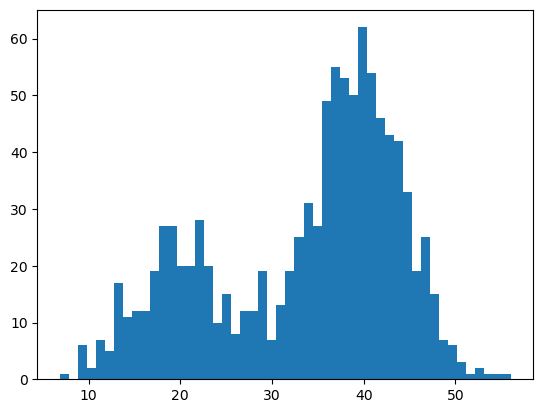

In [25]:
plt.hist(sample, bins=50)

In [26]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

#convert 1-D array to 2-D because model won't support 1-D

sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [27]:
values = np.linspace(sample.min(), sample.max(), 100) # Generate 100 random number in b/w min and max value of sample
values = values.reshape((len(values), 1))

In [28]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities) # score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate

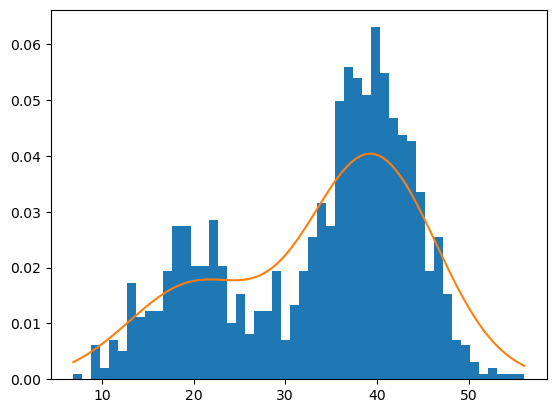

In [29]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)

In [30]:
df = sns.load_dataset('iris')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

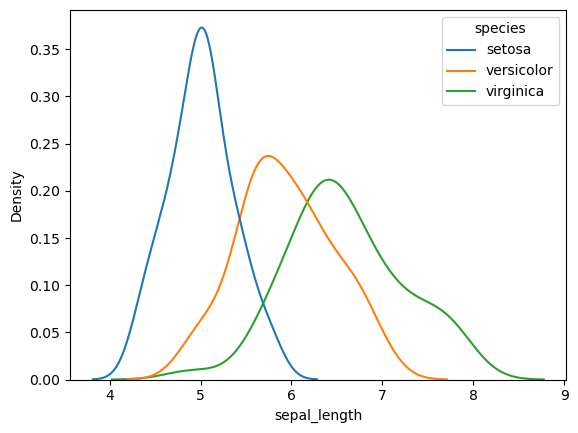

In [32]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

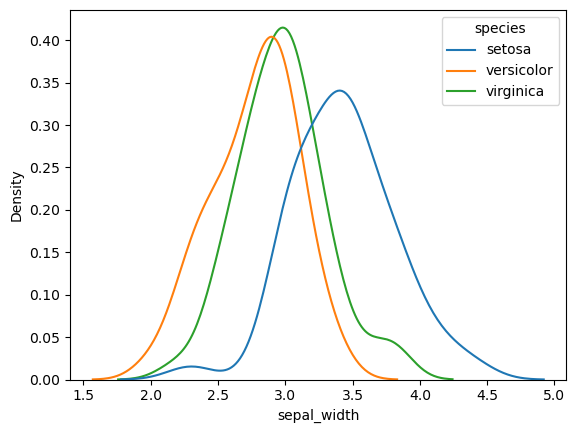

In [33]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

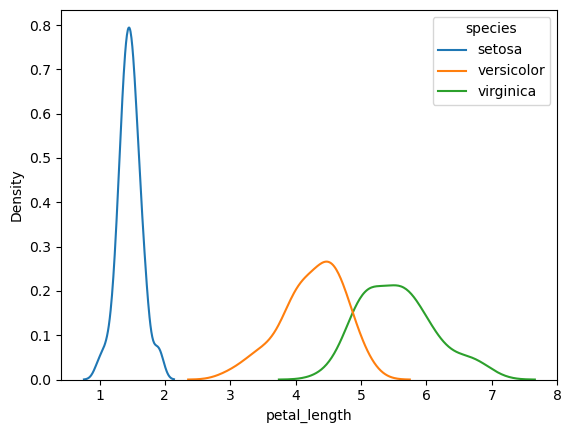

In [34]:
sns.kdeplot(data=df, x='petal_length', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

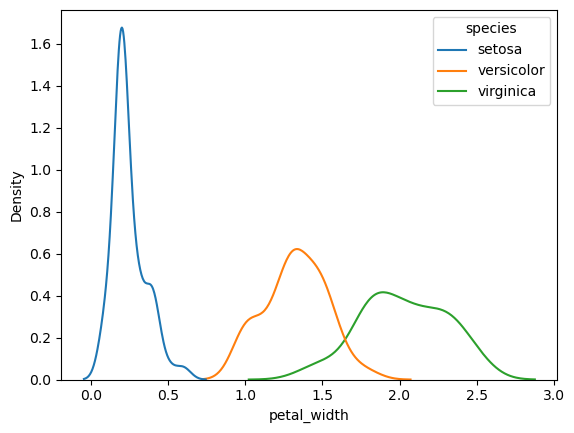

In [35]:
sns.kdeplot(data=df, x='petal_width', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

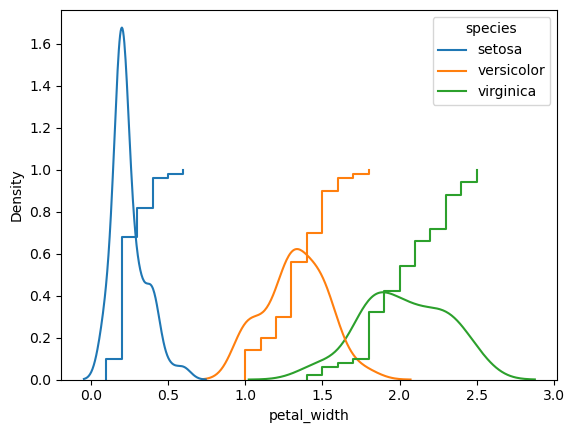

In [36]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')

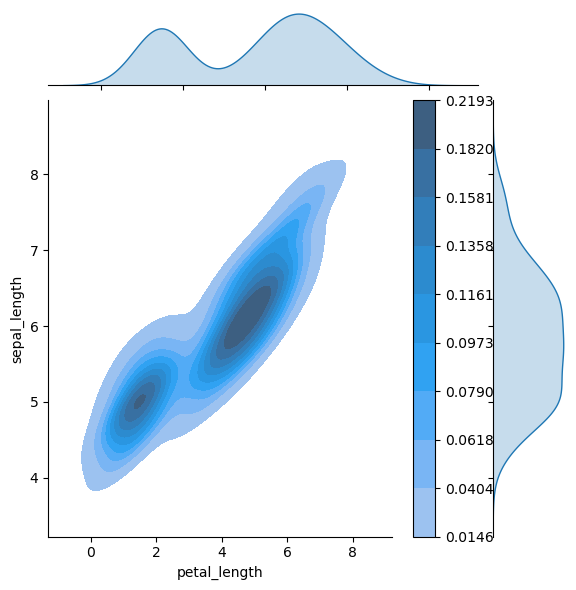

In [37]:
sns.jointplot(data=df, x='petal_length', y='sepal_length', kind='kde', fill= True, cbar=True) #Example of 2-D plot

In [38]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

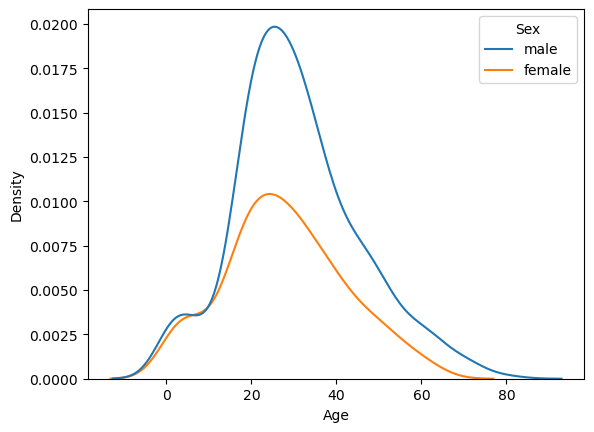

In [40]:
sns.kdeplot(data=titanic, x='Age', hue='Sex')

<Axes: xlabel='Age', ylabel='Density'>

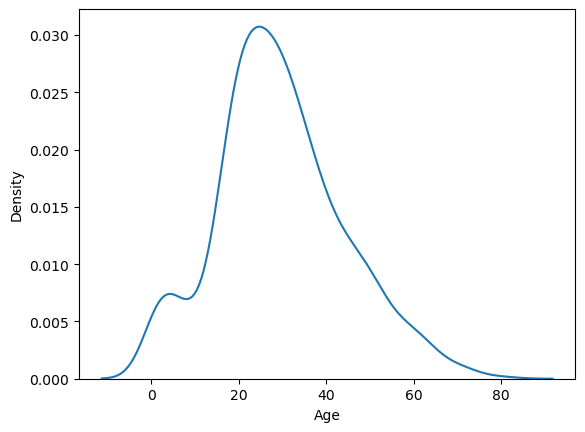

In [41]:
sns.kdeplot(titanic['Age'])

In [42]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [45]:
# Standard normal variate formula
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

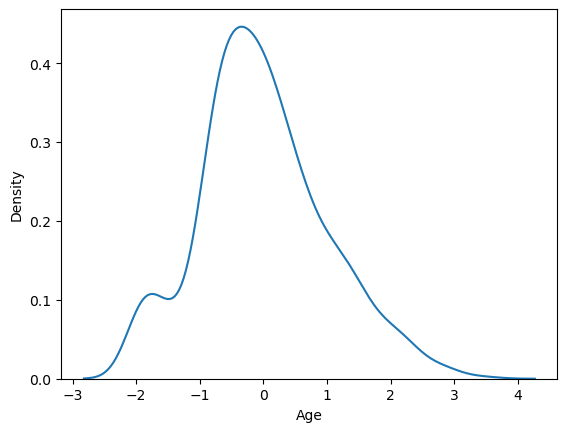

In [44]:
sns.kdeplot(x)

In [46]:
x.describe()

count    7.140000e+02
mean     2.388379e-16
std      1.000000e+00
min     -2.015566e+00
25%     -6.590796e-01
50%     -1.169668e-01
75%      5.714304e-01
max      3.462699e+00
Name: Age, dtype: float64

In [47]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [48]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [49]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.88037434994331)

In [50]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
